In [1]:
import os
import sys
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['font.family']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
from collections import Counter
import seaborn as sns
sys.path.append('/Users/yantingting/PycharmProjects/modeling/')
import database_conncet as data_con
import data_processing as dp
import summary_statistics as ss
from data_io_utils import *

In [2]:
file_path = '/Users/yantingting/Documents/用户画像(印尼)/dataprepare/'

# 平均复贷次数

In [3]:
query1 = '''
select t1.effective_date,
count(distinct t1.customer_id) as cnt_cus,
count(1) as times 
from 
(select customer_id,
return_flag,
effective_date
from dw_gocash_go_cash_loan_gocash_core_loan 
where effective_date is not null
and effective_date::date >= '2019-01-01'
and effective_date::date <= '2019-12-20'
and return_flag = 'false') t1 
left join
(select loan_no,
customer_id,
return_flag,
effective_date
from dw_gocash_go_cash_loan_gocash_core_loan 
where effective_date is not null
and effective_date::date >= '2019-01-01') t2 
on t1.customer_id = t2.customer_id
group by t1.effective_date
'''

In [4]:
df1 = data_con.database_gn(query1)
save_data_to_pickle(df1, file_path, '复贷次数.pkl')

Successful connection


In [4]:
df1 = load_data_from_pickle(file_path,'复贷次数.pkl')
df1.shape

(318, 3)

count    318.000000
mean       3.002696
std        0.790784
min        1.000000
25%        2.517789
50%        2.989112
75%        3.432037
max       10.000000
Name: avg_times, dtype: float64

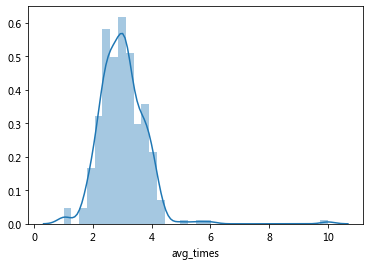

In [5]:
df1['avg_times'] = df1['times']/df1['cnt_cus']
df1['avg_times'].describe().T;
sns.distplot(df1['avg_times'])

# 平均复贷间隔天数

In [8]:
query2 = '''
select vin_effective_date,
count(1) as cnt_loan,
sum(diff_days) as sum_days
from
(
select t1.loan_no,
t1.effective_date as vin_effective_date,
t2.effective_date as sec_effective_date,
t2.effective_date - t1.effective_date as diff_days,
row_number()over(partition by t1.loan_no order by t2.effective_date asc ) as rank_loan
from 
(select loan_no,
customer_id,
effective_date
from dw_gocash_go_cash_loan_gocash_core_loan 
where effective_date is not null
and effective_date::date >= '2019-01-01'
and effective_date::date <= '2019-12-20') t1 
left join
(select loan_no,
customer_id,
effective_date
from dw_gocash_go_cash_loan_gocash_core_loan 
where effective_date is not null
and effective_date::date >= '2019-01-01') t2 
on t1.customer_id = t2.customer_id
where t1.effective_date < t2.effective_date) t
where rank_loan = 1
group by vin_effective_date
'''

In [ ]:
df2 = data_con.database_gn(query2)
save_data_to_pickle(df2, file_path, '复贷间隔天数.pkl')

Successful connection


In [6]:
df2 = load_data_from_pickle(file_path, '复贷间隔天数.pkl')

count    343.000000
mean      25.462253
std       11.744393
min       13.636429
25%       20.371990
50%       22.659529
75%       25.163284
max      102.461538
Name: avg_days, dtype: float64

Text(0.5, 1.0, '放款平均间隔天数')

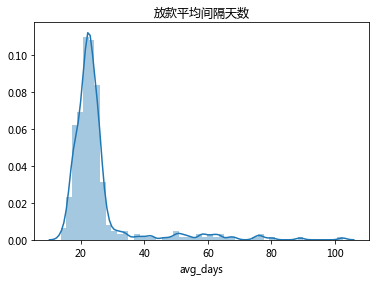

In [8]:
df2['avg_days'] = df2['sum_days']/ df2['cnt_loan']
df2['avg_days'].describe().T;
sns.distplot(df2['avg_days'])
plt.title(u'放款平均间隔天数')